## Generate data
Model a golf ball dropping for a period of time with air drag.

In [1]:
# This data generation code was generated in part using ClaudeAI

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Golf ball parameters
mass = 0.0459  # kg (standard golf ball mass)
diameter = 0.0427  # meters (standard golf ball diameter)
area = np.pi * (diameter/2)**2  # cross-sectional area
Cd = 0.47  # approximate drag coefficient for a sphere
rho = 1.225  # air density in kg/m^3

# Gravitational acceleration
g = 9.81  # m/s^2

def derivatives(t, state):
    """Calculate derivatives of position and velocity"""
    position, velocity = state
    
    # Calculate drag force
    drag = 0.5 * rho * area * Cd * velocity**2 * np.sign(-velocity)
    
    # Calculate acceleration (F = ma)
    acceleration = -g + drag/mass
    
    return [velocity, acceleration]

# Initial conditions
initial_height = 70  # meters
initial_velocity = 0  # m/s
y0 = [initial_height, initial_velocity]
t_min = 0
t_max = 4
t_smooth = np.linspace(t_min, t_max, 1000)

# Solve the system
sol = solve_ivp(
    derivatives,
    t_span=(t_min, t_max),
    y0=y0,
    t_eval=t_smooth,
    rtol=1e-8,
    atol=1e-8
)

# Sample at 0.5-second intervals and add noise
t = np.linspace(t_min, t_max, int(1 + 2 * (t_max-t_min)) ) 
true_heights = np.interp(t, sol.t, sol.y[0])

# Add Gaussian noise with σ = 1m
np.random.seed(112)  # for reproducibility
sigma = 1 # 1m Gaussian noise
noise = np.random.normal(0, sigma, len(t))
h = true_heights + noise
dh = np.ones_like(t) * sigma

## Fit data
This code is based on the PHYS 219 fitting code

In [2]:
###############################################################################
# DEFINE FUNCTIONS
###############################################################################

# Fitting function
def position_model(t, h0, a):
    return h0 + 0.5 * a * t**2

# Define the function that calculates chi-squared
def chi_square(fit_parameters, x, y, sigma, fit_function):
    dof = len(x) - len(fit_params)
    return np.sum((y - fit_function(x, *fit_parameters)) ** 2 / sigma**2)/dof

###############################################################################
# PERFORM THE FIT AND GENERATE ADDITIONAL QUANTITIES NEEDED
###############################################################################

# Perform the fit
fit_params, fit_cov = curve_fit(position_model, t, h, sigma=dh, absolute_sigma=True)
h0_fit = fit_params[0]
a_fit = fit_params[1]

# Calculate and print reduced chi-squared
chi2 = chi_square(fit_params, t, h, dh, position_model)

# Generate fitted curve
h_fit = position_model(t_smooth, h0_fit, a_fit)

# Calculate the uncertainties in the fit parameters
fit_params_error = np.sqrt(np.diag(fit_cov))
dh0_fit = fit_params_error[0]
da_fit = fit_params_error[1]

# Calculate residuals
residuals = h - position_model(t, h0_fit, a_fit)

## Generate plots with Markdown caption

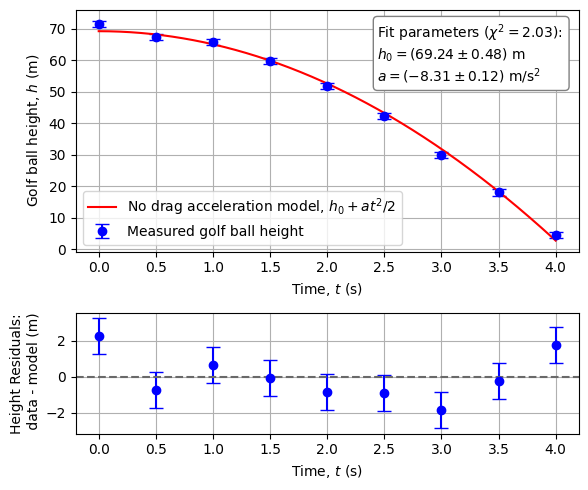

In [3]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 5), height_ratios=[2, 1])

# Plot the data and fit
ax1.errorbar(t, h, yerr=dh, fmt='o', color='blue', label='Measured golf ball height', capsize=5)
model_label = r'No drag acceleration model, $h_0 + at^2/2$'
ax1.plot(t_smooth, h_fit, 'r-', label = model_label)
ax1.set_xlabel(r'Time, $t$ (s)')
ax1.set_ylabel(r'Golf ball height, $h$ (m)')
ax1.legend(loc='lower left')
ax1.grid(True)

# Set y-axis limits to always include 0
ymin, ymax = ax1.get_ylim()
ax1.set_ylim(bottom=min(0, ymin), top=max(ymax, 0))

# Create annotation text where ''' ''' indicates a multiline string and 
# fr'' indicates an f-string (one where you can embed variables) and an r-string (which can include LaTeX)
ax1_annotation = fr'''Fit parameters ($\chi^2={{{chi2:.2f}}})$: 
$h_0 = ({{{h0_fit:.2f}}}\pm{{{dh0_fit:.2f}}})$ m 
$a = ({{{a_fit:.2f}}}\pm{{{da_fit:.2f}}})$ m/s$^2$'''

# Position the annotation
ax1.text(
    0.6, 0.95,  # x, y coordinates in axes fraction (0-1 range)
    ax1_annotation,  # The annotation text string
    transform=ax1.transAxes,  # Use axis coordinate system
    verticalalignment='top',  # Align text at the top
    horizontalalignment='left',  # Align text to the left
    bbox=dict(boxstyle="round,pad=0.3", edgecolor='gray', facecolor='white')  # Add a styled box
)

# Plot residuals
ax2.errorbar(t, residuals, yerr=dh, fmt='o', color='blue', label='Residuals', capsize=5)
ax2.axhline(y=0, color='dimgrey', linestyle='--')
ax2.set_xlabel(r'Time, $t$ (s)')
ax2.set_ylabel('Height Residuals:\n data - model (m)')
ax2.grid(True)

# Adjust layout to avoid clipping of content
plt.tight_layout()

# Save the figure without the caption
plt.savefig('uncaptioned_figure.png')

plt.show()

**Figure 1.** Measurement of the position of a golf ball being dropped from an initial height of 70 m and whose height is being measured from below using a sonic range-finder. Our model excludes drag, but includes uniform acceleration $(a)$ and a non-zero starting height $(h_0)$ as fitting parameters. Despite the fact that the reduced chi-squared for the model is only 2.03, we have determined that this model does not describe the data very well due the visible trend in the residuals and the value of $a$ that is inconsistent with $g = 9.811 \, m/s^2$. 

## Generate plots with `plt.figtext` caption

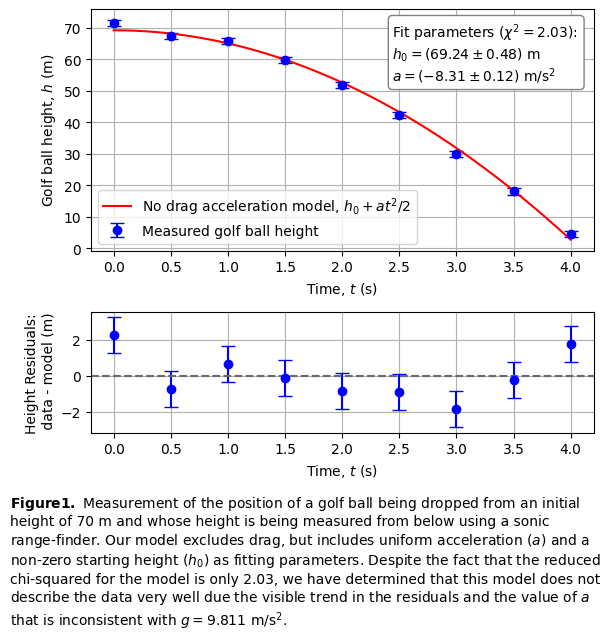

In [4]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 5), height_ratios=[2, 1])

# Plot the data and fit
ax1.errorbar(t, h, yerr=dh, fmt='o', color='blue', label='Measured golf ball height', capsize=5)
model_label = r'No drag acceleration model, $h_0 + at^2/2$'
ax1.plot(t_smooth, h_fit, 'r-', label = model_label)
ax1.set_xlabel(r'Time, $t$ (s)')
ax1.set_ylabel(r'Golf ball height, $h$ (m)')
ax1.legend(loc='lower left')
ax1.grid(True)

# Set y-axis limits to always include 0
ymin, ymax = ax1.get_ylim()
ax1.set_ylim(bottom=min(0, ymin), top=max(ymax, 0))

# Add an annotation
ax1_annotation = fr'''Fit parameters ($\chi^2={{{chi2:.2f}}})$: 
$h_0 = ({{{h0_fit:.2f}}}\pm{{{dh0_fit:.2f}}})$ m 
$a = ({{{a_fit:.2f}}}\pm{{{da_fit:.2f}}})$ m/s$^2$'''
ax1.text(
    0.6, 0.95,  # x, y coordinates in axes fraction (0-1 range)
    ax1_annotation,  # The annotation text string
    transform=ax1.transAxes,  # Use axis coordinate system
    verticalalignment='top',  # Align text at the top
    horizontalalignment='left',  # Align text to the left
    bbox=dict(boxstyle="round,pad=0.3", edgecolor='gray', facecolor='white')  # Add a styled box
)

# Plot residuals
ax2.errorbar(t, residuals, yerr=dh, fmt='o', color='blue', label='Residuals', capsize=5)
ax2.axhline(y=0, color='dimgrey', linestyle='--')
ax2.set_xlabel(r'Time, $t$ (s)')
ax2.set_ylabel('Height Residuals:\n data - model (m)')
ax2.grid(True)

# We build the caption from multiple strings to keep lines from getting too long and to
# allow for a use of mixed string formats
s1 = r'$\mathbf{Figure 1.}$ '
s2 = f'Measurement of the position of a golf ball being dropped from an initial height of {initial_height} m and whose height is being measured from below using a sonic range-finder. '
s3 = r'Our model excludes drag, but includes uniform acceleration $(a)$ and a non-zero starting height $(h_0)$ as fitting parameters. '
s4 = f'Despite the fact that the reduced chi-squared for the model is only {chi2:.2f}, ' 
s5 = r'we have determined that this model does not describe the data very well due the visible trend in the residuals and the value of $a$ that is inconsistent with $g = 9.811$ m/s$^2$.'

# Build the caption from the sub-strings
caption = s1 + s2 + s3 + s4 + s5

# Add the caption below the other subplots
plt.figtext(0, 0, caption, ha='left', va='top', wrap=True)

# Adjust layout to avoid clipping of content
plt.tight_layout()

# Save the figure, ensuring the caption is included within the saved figure
plt.savefig('captioned_figure.png', bbox_inches='tight')

plt.show()